# Tujuan Utama
> Analisis dan Perbandingan Model Klasifikasi Naive Bayes dan KNN untuk Mengidentifikasi Kriteria Penerima Beasiswa KIP

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load & Check Dataset

In [ ]:
datakip = pd.read_csv("/content/Data Penelitian 2024-nitaaa.csv")
datakip.head(5)

,NAMA MAHASISWA,JURUSAN,FORMULIR CALON PENERIMA,FC KTP,FC KK,KIP/KKS/PKH,FC IJAZAH,PRESTASI,FOTO RUMAH,FC REK LISTRIK,S.TIDAK MAMPU,PK. ORANG TUA,JUM UKT,TANGGUNGAN ORTU,STATUS DITERIMA
0,JHADUL TEMPAT,HUKUM KELUARGA ISLAM,ADA,ADA,ADA,KIP,ADA,ADA,ADA,ADA,ADA,PETANI,"Rp400,000",4,YA
1,AMALIA ILMI,HUKUM KELUARGA ISLAM,ADA,ADA,ADA,KIP,ADA,ADA,ADA,ADA,ADA,PERKEBUNAN,"Rp1,500,000",5,YA
2,SYAWAL SUARDI,HUKUM KELUARGA ISLAM,ADA,ADA,ADA,KKS,ADA,ADA,ADA,ADA,ADA,PERKEBUNAN,"Rp2,000,000",PIATU,YA
3,MELISA,HUKUM KELUARGA ISLAM,ADA,ADA,ADA,KKS,ADA,ADA,ADA,ADA,ADA,NELAYAN,"Rp1,500,000",4,YA
4,ZULFADLIAH NURZALI,HUKUM KELUARGA ISLAM,ADA,ADA,ADA,TIDAK,ADA,ADA,ADA,ADA,ADA,PETANI,"Rp1,500,000",YATIM PIATU,YA


In [ ]:
datakip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NAMA MAHASISWA           399 non-null    object
 1   JURUSAN                  399 non-null    object
 2   FORMULIR CALON PENERIMA  399 non-null    object
 3   FC KTP                   399 non-null    object
 4   FC KK                    399 non-null    object
 5   KIP/KKS/PKH              399 non-null    object
 6   FC IJAZAH                399 non-null    object
 7   PRESTASI                 399 non-null    object
 8   FOTO RUMAH               399 non-null    object
 9   FC REK LISTRIK           399 non-null    object
 10  S.TIDAK MAMPU            400 non-null    object
 11  PK. ORANG TUA            399 non-null    object
 12  JUM UKT                  399 non-null    object
 13  TANGGUNGAN ORTU          399 non-null    object
 14  STATUS DITERIMA          399 non-null    o

In [ ]:
datakip = datakip.dropna()
datakip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 398
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NAMA MAHASISWA           399 non-null    object
 1   JURUSAN                  399 non-null    object
 2   FORMULIR CALON PENERIMA  399 non-null    object
 3   FC KTP                   399 non-null    object
 4   FC KK                    399 non-null    object
 5   KIP/KKS/PKH              399 non-null    object
 6   FC IJAZAH                399 non-null    object
 7   PRESTASI                 399 non-null    object
 8   FOTO RUMAH               399 non-null    object
 9   FC REK LISTRIK           399 non-null    object
 10  S.TIDAK MAMPU            399 non-null    object
 11  PK. ORANG TUA            399 non-null    object
 12  JUM UKT                  399 non-null    object
 13  TANGGUNGAN ORTU          399 non-null    object
 14  STATUS DITERIMA          399 non-null    object

In [ ]:
# Normalisasi nama kolom
datakip.columns = [col.lower().replace(' ', '_').replace('.', '').replace('/', '_') for col in datakip.columns]

In [ ]:
# Ubah tipe data kolom biner
kolom_biner = [
    'formulir_calon_penerima', 'fc_ktp', 'fc_kk', 'fc_ijazah', 'prestasi',
    'foto_rumah', 'fc_rek_listrik', 'stidak_mampu'
]


datakip[kolom_biner] = datakip[kolom_biner].replace({'ADA':1, 'YA': 1, 'TIDAK': 0})

# Mengubah tipe data kolom biner ke integer
datakip[kolom_biner] = datakip[kolom_biner].astype(int)

datakip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 398
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nama_mahasiswa           399 non-null    object
 1   jurusan                  399 non-null    object
 2   formulir_calon_penerima  399 non-null    int64 
 3   fc_ktp                   399 non-null    int64 
 4   fc_kk                    399 non-null    int64 
 5   kip_kks_pkh              399 non-null    object
 6   fc_ijazah                399 non-null    int64 
 7   prestasi                 399 non-null    int64 
 8   foto_rumah               399 non-null    int64 
 9   fc_rek_listrik           399 non-null    int64 
 10  stidak_mampu             399 non-null    int64 
 11  pk_orang_tua             399 non-null    object
 12  jum_ukt_                 399 non-null    object
 13  tanggungan_ortu          399 non-null    object
 14  status_diterima          399 non-null    object

<ipython-input-6-f849086981a8>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datakip[kolom_biner] = datakip[kolom_biner].replace({'ADA':1, 'YA': 1, 'TIDAK': 0})


In [ ]:
def encode_tunjangan_ortu(value):
    # Pastikan value berupa string agar perbandingan bisa dilakukan
    if isinstance(value, str):
        # Hilangkan spasi ekstra dan ubah menjadi huruf kapital
        value_clean = value.strip().upper()
        # Jika nilainya merupakan salah satu dari kategori khusus, return 0
        if value_clean in ['YATIM', 'PIATU', 'YATIM PIATU']:
            return 0
        # Jika nilai berupa digit, konversi ke integer
        elif value_clean.isdigit():
            return int(value_clean)
        else:
            # Jika ada nilai lain yang tidak sesuai, bisa dikembalikan nilai default, misal 0
            return 0
    # Jika value sudah numerik, langsung kembalikan
    return value

# Terapkan fungsi pada kolom tunjangan_ortu dan simpan hasilnya pada kolom baru
datakip['tanggungan_ortu_encoded'] = datakip['tanggungan_ortu'].apply(encode_tunjangan_ortu)

In [ ]:
datakip.head(5)

,nama_mahasiswa,jurusan,formulir_calon_penerima,fc_ktp,fc_kk,kip_kks_pkh,fc_ijazah,prestasi,foto_rumah,fc_rek_listrik,stidak_mampu,pk_orang_tua,jum_ukt_,tanggungan_ortu,status_diterima,tanggungan_ortu_encoded
0,JHADUL TEMPAT,HUKUM KELUARGA ISLAM,1,1,1,KIP,1,1,1,1,1,PETANI,"Rp400,000",4,YA,4
1,AMALIA ILMI,HUKUM KELUARGA ISLAM,1,1,1,KIP,1,1,1,1,1,PERKEBUNAN,"Rp1,500,000",5,YA,5
2,SYAWAL SUARDI,HUKUM KELUARGA ISLAM,1,1,1,KKS,1,1,1,1,1,PERKEBUNAN,"Rp2,000,000",PIATU,YA,0
3,MELISA,HUKUM KELUARGA ISLAM,1,1,1,KKS,1,1,1,1,1,NELAYAN,"Rp1,500,000",4,YA,4
4,ZULFADLIAH NURZALI,HUKUM KELUARGA ISLAM,1,1,1,TIDAK,1,1,1,1,1,PETANI,"Rp1,500,000",YATIM PIATU,YA,0


In [ ]:
# Membersihkan data
datakip['jum_ukt_'] = datakip['jum_ukt_'].astype(str)
datakip['jum_ukt_'] = datakip['jum_ukt_'].str.replace('Rp', '', regex=False)
datakip['jum_ukt_'] = datakip['jum_ukt_'].str.replace(',', '', regex=False)
datakip['jum_ukt_'] = datakip['jum_ukt_'].str.strip()

# Mengubah ke numerik
datakip['jum_ukt_'] = pd.to_numeric(datakip['jum_ukt_'], errors='coerce')

# Ganti ke int
datakip['jum_ukt_'] = datakip['jum_ukt_'].astype(int)

datakip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 398
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nama_mahasiswa           399 non-null    object
 1   jurusan                  399 non-null    object
 2   formulir_calon_penerima  399 non-null    int64 
 3   fc_ktp                   399 non-null    int64 
 4   fc_kk                    399 non-null    int64 
 5   kip_kks_pkh              399 non-null    object
 6   fc_ijazah                399 non-null    int64 
 7   prestasi                 399 non-null    int64 
 8   foto_rumah               399 non-null    int64 
 9   fc_rek_listrik           399 non-null    int64 
 10  stidak_mampu             399 non-null    int64 
 11  pk_orang_tua             399 non-null    object
 12  jum_ukt_                 399 non-null    int64 
 13  tanggungan_ortu          399 non-null    object
 14  status_diterima          399 non-null    object

In [ ]:
datakip['kip_kks_pkh'].unique()

array(['KIP', 'KKS', 'TIDAK', 'ADA'], dtype=object)

In [ ]:
# Mapping kolom
kip_kks_pkh_mapping = {
    'KIP': 1,
    'ADA': 1,
    'KKS': 2,
    'TIDAK': 0
}

datakip['kip_kks_pkh'] = datakip['kip_kks_pkh'].map(kip_kks_pkh_mapping).fillna(0).astype(int)

In [ ]:
# Convert 'jum_ukt_' to float with two decimal places
datakip['jum_ukt_'] = datakip['jum_ukt_'].astype(float) / 1000000
datakip['jum_ukt_'] = datakip['jum_ukt_'].round(2)

In [ ]:
datakip.head(5)

,nama_mahasiswa,jurusan,formulir_calon_penerima,fc_ktp,fc_kk,kip_kks_pkh,fc_ijazah,prestasi,foto_rumah,fc_rek_listrik,stidak_mampu,pk_orang_tua,jum_ukt_,tanggungan_ortu,status_diterima,tanggungan_ortu_encoded
0,JHADUL TEMPAT,HUKUM KELUARGA ISLAM,1,1,1,1,1,1,1,1,1,PETANI,0.4,4,YA,4
1,AMALIA ILMI,HUKUM KELUARGA ISLAM,1,1,1,1,1,1,1,1,1,PERKEBUNAN,1.5,5,YA,5
2,SYAWAL SUARDI,HUKUM KELUARGA ISLAM,1,1,1,2,1,1,1,1,1,PERKEBUNAN,2.0,PIATU,YA,0
3,MELISA,HUKUM KELUARGA ISLAM,1,1,1,2,1,1,1,1,1,NELAYAN,1.5,4,YA,4
4,ZULFADLIAH NURZALI,HUKUM KELUARGA ISLAM,1,1,1,0,1,1,1,1,1,PETANI,1.5,YATIM PIATU,YA,0


In [ ]:
datakip.describe(include='all')

,nama_mahasiswa,jurusan,formulir_calon_penerima,fc_ktp,fc_kk,kip_kks_pkh,fc_ijazah,prestasi,foto_rumah,fc_rek_listrik,stidak_mampu,pk_orang_tua,jum_ukt_,tanggungan_ortu,status_diterima,tanggungan_ortu_encoded
count,399,399,399.0,399.000000,399.000000,399.000000,399.0,399.000000,399.000000,399.000000,399.000000,399,399.000000,399,399,399.000000
unique,395,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,10,2,NaN
top,NURHALISA,ILMU HUKUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PETANI,NaN,3,YA,NaN
freq,2,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197,NaN,96,299,NaN
mean,NaN,NaN,1.0,0.997494,0.997494,1.080201,1.0,0.634085,0.994987,0.997494,0.997494,NaN,1.771078,NaN,NaN,2.546366
std,NaN,NaN,0.0,0.050063,0.050063,0.775624,0.0,0.482290,0.070710,0.050063,0.050063,NaN,0.718571,NaN,NaN,1.748576
min,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,NaN,0.400000,NaN,NaN,0.000000
25%,NaN,NaN,1.0,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,NaN,1.490000,NaN,NaN,1.000000
50%,NaN,NaN,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,NaN,2.040000,NaN,NaN,3.000000
75%,NaN,NaN,1.0,1.000000,1.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,NaN,2.400000,NaN,NaN,4.000000


# EDA (Exploratory Data Analysis)

## Variabel Numerik

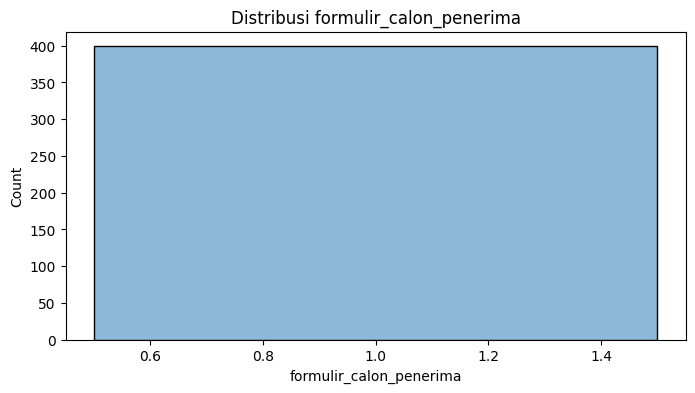

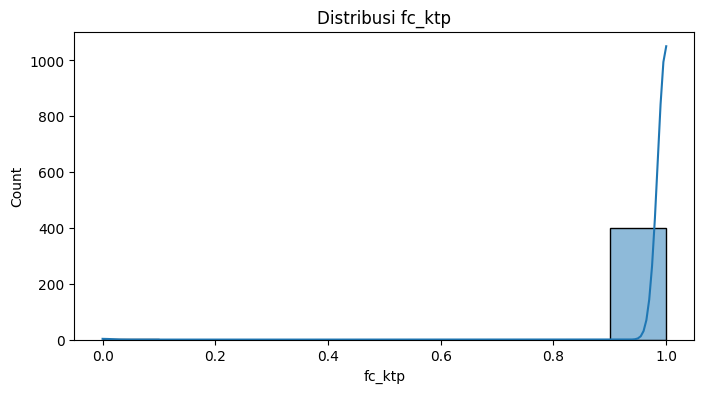

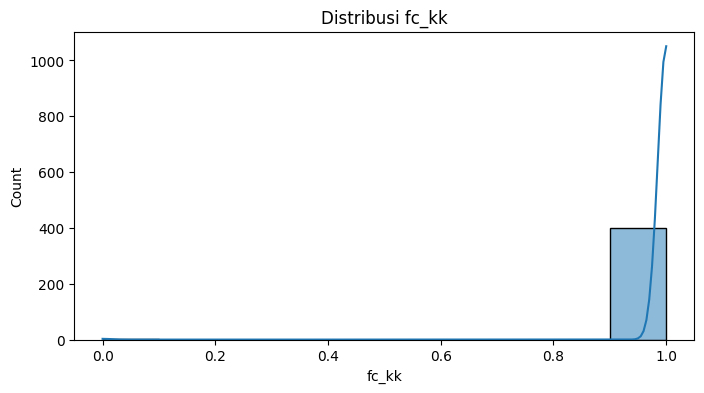

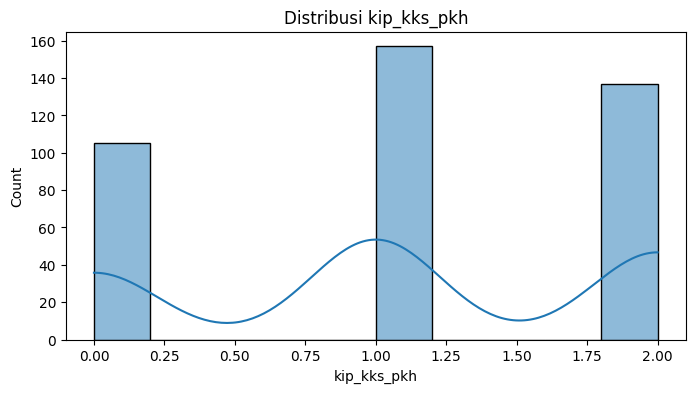

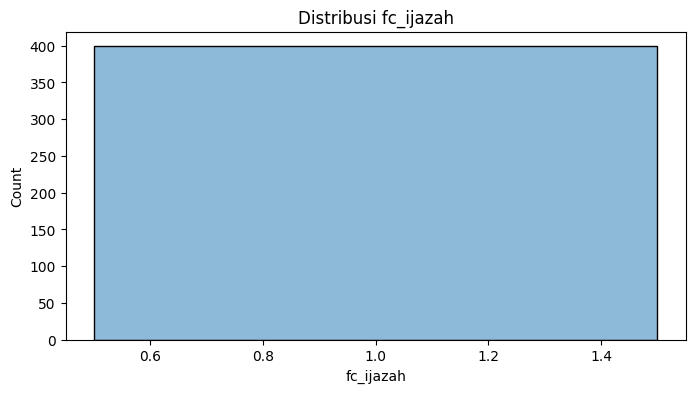

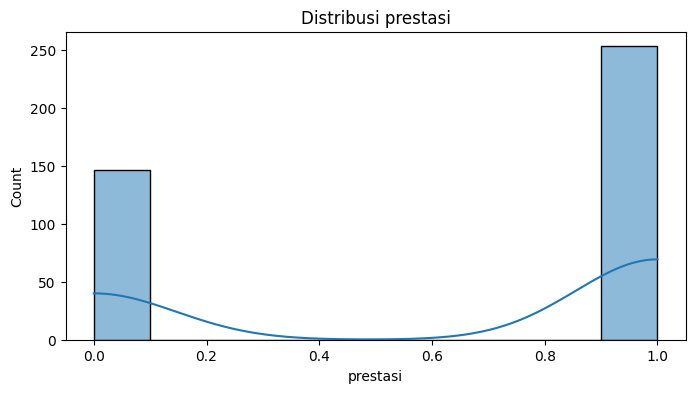

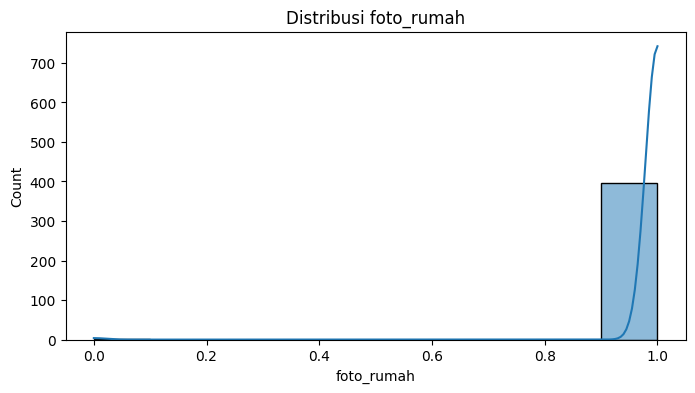

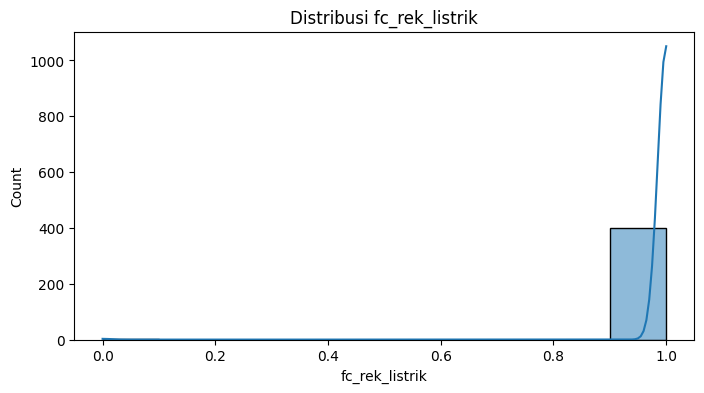

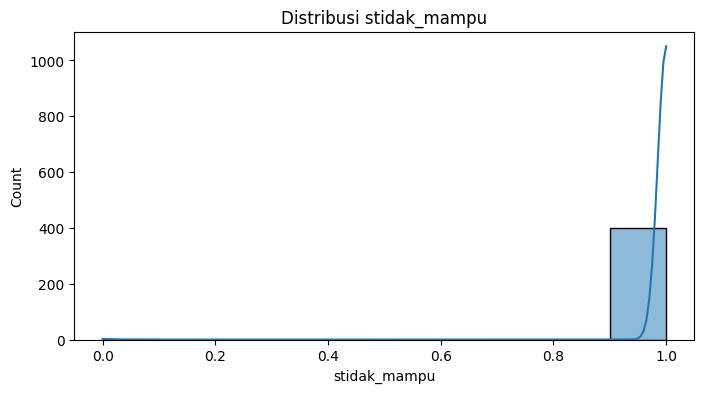

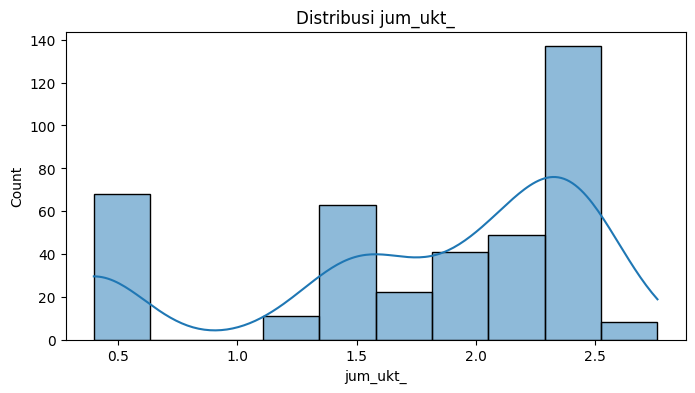

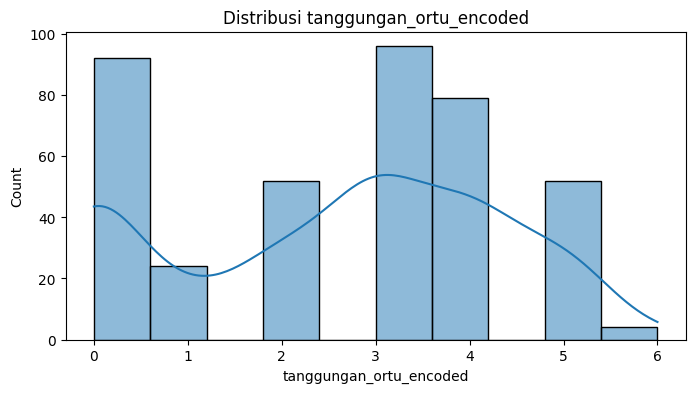

In [ ]:
numerical_columns = datakip.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(datakip[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

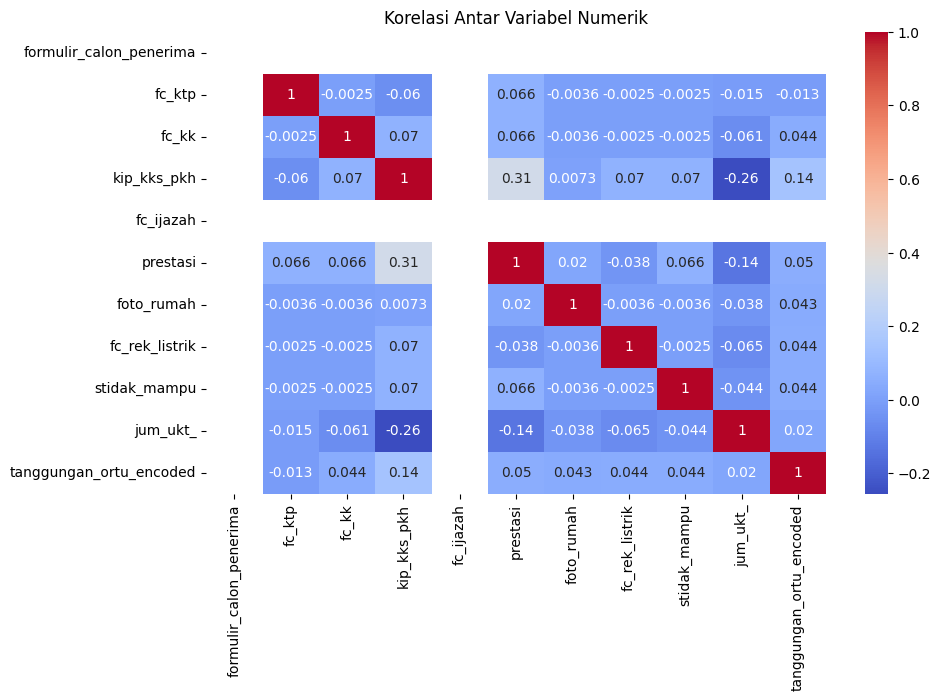

In [ ]:
# Analisis Korelasi antar kolom numerik
if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(datakip[numerical_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Korelasi Antar Variabel Numerik')
    plt.show()

## Variabel Kategorikal

In [ ]:
# Mengubah kolom
datakip['pk_orang_tua'] = datakip['pk_orang_tua'].replace("LAINYA'", "LAINNYA")
datakip['pk_orang_tua'] = datakip['pk_orang_tua'].replace("PETANNI", "PETANI")

In [ ]:
categorical_cols = datakip.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'nama_mahasiswa':  # Skip nama mahasiswa
        value_counts = datakip[col].value_counts(dropna=False)
        print(f"\nDistribusi nilai untuk {col}:")
        print(value_counts)


Distribusi nilai untuk jurusan:
jurusan
ILMU HUKUM                                     32
PENDIDIKAN BAHASA ARAB                         26
PENDIDIKAN AGAMA ISLAM                         25
HUKUM TATA NEGARA                              25
PENDIDIKAN MATEMATIKA                          19
PENDIDIKAN BIOLOGI                             19
PENDIDIKAN BAHASA INGGRIS                      18
ILMU POLITIK                                   18
HUKUM EKONOMI SYARIAH                          17
PENDIDIKAN FISIKA                              16
MANAJEMEN PENDIDIKAN ISLAM                     15
PERBANDINGAN MAZHAB & HUKUM                    14
BAHASA & SASTRA ARAB                           14
PGMI                                           14
SOSIOLOGI AGAMA                                13
HUBUNGAN INTERNASIONAL                         13
HUKUM KELUARGA ISLAM                            8
PENDIDIKAN ANAK USIA DINI                       7
ILMU FALAK                                      7
KESEJAHTE

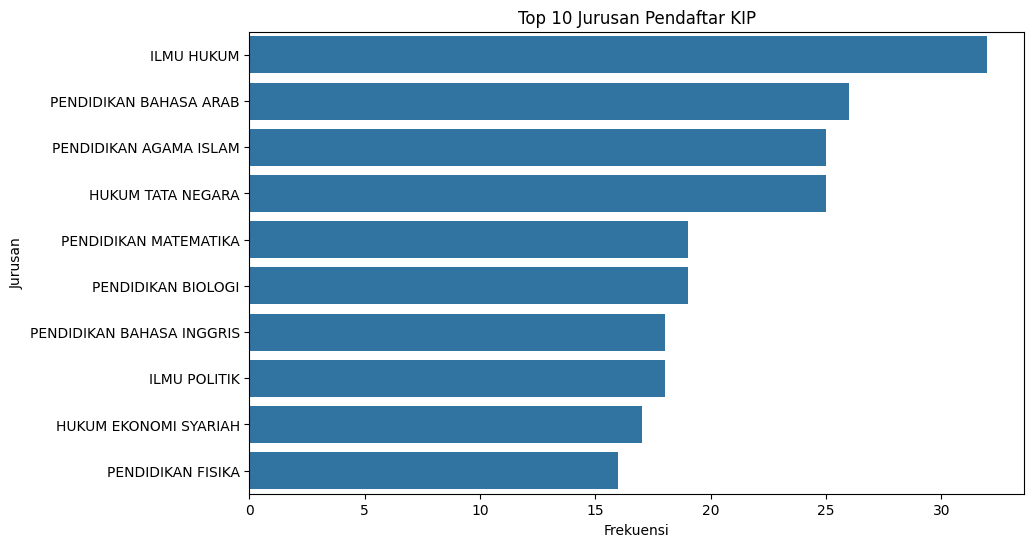

In [ ]:
# Data jurusan
jurusan_counts = datakip['jurusan'].value_counts()

# Bar Plot Horizontal untuk Top-10 Jurusan
plt.figure(figsize=(10, 6))
sns.barplot(x=jurusan_counts.head(10), y=jurusan_counts.head(10).index)
plt.title('Top 10 Jurusan Pendaftar KIP')
plt.xlabel('Frekuensi')
plt.ylabel('Jurusan')
plt.show()

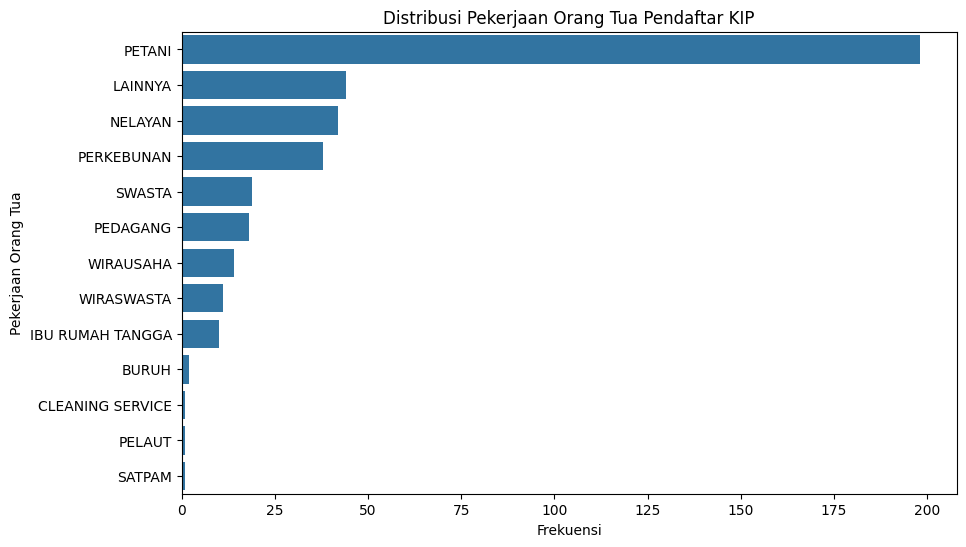

In [ ]:
# Data pk_orang_tua
pk_counts = datakip['pk_orang_tua'].value_counts()

# Bar Plot Horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=pk_counts.values, y=pk_counts.index)
plt.title('Distribusi Pekerjaan Orang Tua Pendaftar KIP')
plt.xlabel('Frekuensi')
plt.ylabel('Pekerjaan Orang Tua')
plt.show()

## Visualisasi Kolom Target (status_diterima)

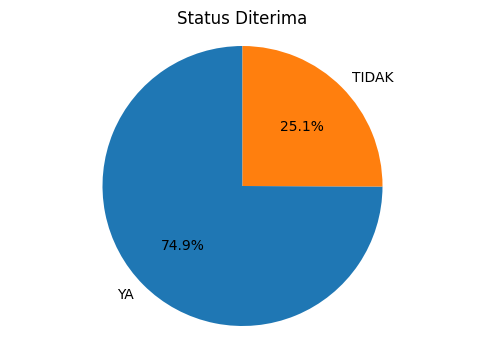

In [ ]:
status_counts = datakip['status_diterima'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Status Diterima')
plt.axis('equal')
plt.show()

# Data Preparation

In [ ]:
datakip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 398
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nama_mahasiswa           399 non-null    object 
 1   jurusan                  399 non-null    object 
 2   formulir_calon_penerima  399 non-null    int64  
 3   fc_ktp                   399 non-null    int64  
 4   fc_kk                    399 non-null    int64  
 5   kip_kks_pkh              399 non-null    int64  
 6   fc_ijazah                399 non-null    int64  
 7   prestasi                 399 non-null    int64  
 8   foto_rumah               399 non-null    int64  
 9   fc_rek_listrik           399 non-null    int64  
 10  stidak_mampu             399 non-null    int64  
 11  pk_orang_tua             399 non-null    object 
 12  jum_ukt_                 399 non-null    float64
 13  tanggungan_ortu          399 non-null    object 
 14  status_diterima          399 no

In [ ]:
# Mengubah kolom 'pk_orang_tua' menjadi numerik
pk_mapping = {
    'PETANI': 0,
    'NELAYAN': 1,
    'LAINNYA': 2,
    'PERKEBUNAN': 3,
    'SWASTA': 4,
    'PEDAGANG': 5,
    'WIRAUSAHA': 6,
    'WIRASWASTA': 7,
    'IBU RUMAH TANGGA': 8,
    'BURUH': 9,
    'CLEANING SERVICE': 10,
    'PELAUT': 11,
    'SATPAM': 12
}
datakip['pk_orang_tua'] = datakip['pk_orang_tua'].map(pk_mapping)

In [ ]:
datakip.head(5)

,nama_mahasiswa,jurusan,formulir_calon_penerima,fc_ktp,fc_kk,kip_kks_pkh,fc_ijazah,prestasi,foto_rumah,fc_rek_listrik,stidak_mampu,pk_orang_tua,jum_ukt_,tanggungan_ortu,status_diterima,tanggungan_ortu_encoded
0,JHADUL TEMPAT,HUKUM KELUARGA ISLAM,1,1,1,1,1,1,1,1,1,0,0.4,4,YA,4
1,AMALIA ILMI,HUKUM KELUARGA ISLAM,1,1,1,1,1,1,1,1,1,3,1.5,5,YA,5
2,SYAWAL SUARDI,HUKUM KELUARGA ISLAM,1,1,1,2,1,1,1,1,1,3,2.0,PIATU,YA,0
3,MELISA,HUKUM KELUARGA ISLAM,1,1,1,2,1,1,1,1,1,1,1.5,4,YA,4
4,ZULFADLIAH NURZALI,HUKUM KELUARGA ISLAM,1,1,1,0,1,1,1,1,1,0,1.5,YATIM PIATU,YA,0


In [ ]:
datakip.isnull().sum()

,0
nama_mahasiswa,0
jurusan,0
formulir_calon_penerima,0
fc_ktp,0
fc_kk,0
kip_kks_pkh,0
fc_ijazah,0
prestasi,0
foto_rumah,0
fc_rek_listrik,0


# Pisahkan Fitur dan Label

In [ ]:
fitur = [
    'formulir_calon_penerima',
    'fc_ktp',
    'fc_kk',
    'kip_kks_pkh',
    'fc_ijazah',
    'prestasi',
    'foto_rumah',
    'fc_rek_listrik',
    'stidak_mampu',
    'pk_orang_tua',
    'jum_ukt_',
    'tanggungan_ortu_encoded'
]

In [ ]:
X = datakip[fitur]
y = datakip['status_diterima']

# Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Naive Bayes Classifier

## Menyeimbangkan Jumlah Kelas

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Lakukan oversampling pada data training menggunakan SMOTE
smote = SMOTE(random_state=1)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

## Bangun Model Naive Bayes

In [ ]:
# Melatih model dengan data yang telah di-oversampling
model = GaussianNB()
model.fit(X_train_over, y_train_over)

# Evaluasi model pada data testing yang asli
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("\nReport Algoritma Naive Bayes:")
print(classification_report(y_test, y_pred))

Akurasi Model: 73.75%

Report Algoritma Naive Bayes:
              precision    recall  f1-score   support

       TIDAK       1.00      0.05      0.09        22
          YA       0.73      1.00      0.85        58

    accuracy                           0.74        80
   macro avg       0.87      0.52      0.47        80
weighted avg       0.81      0.74      0.64        80



📌 Analisis Hasil Klasifikasi dengan Naive Bayes:

> Kelas "TIDAK" (Tidak menerima beasiswa)

- Precision = 1.00 → Semua prediksi "TIDAK" benar.
- Recall = 0.05 → Hanya 5% dari data "TIDAK" yang terdeteksi dengan benar (sangat buruk).
- F1-score = 0.09 → Kombinasi precision dan recall menunjukkan model sangat lemah dalam mengenali "TIDAK".

> Kelas "YA" (Menerima beasiswa)

- Precision = 0.73 → 73% dari prediksi "YA" benar.
- Recall = 1.00 → Semua data "YA" diklasifikasikan dengan benar.
- F1-score = 0.85 → Model lebih cenderung memprediksi "YA" dibandingkan "TIDAK".

PROBLEM UTAMA NAIVE BAYES:
- Model hampir selalu memprediksi "YA" karena recall kelas "TIDAK" sangat rendah.
- Bias ke kelas mayoritas (overfitting ke "YA").
- Tidak mampu menangani korelasi antar fitur karena asumsi indepedensi fitur.

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scaling data train dan test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buat model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# Lakukan prediksi pada data testing yang juga telah di-scale
y_pred = model_knn.predict(X_test_scaled)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nReport Algoritma KNN:\n", classification_report(y_test, y_pred))

Akurasi: 0.95

Report Algoritma KNN:
               precision    recall  f1-score   support

       TIDAK       0.91      0.91      0.91        22
          YA       0.97      0.97      0.97        58

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



📌 Analisis Hasil Klasifikasi dengan KNN:

> Kelas "TIDAK" (Tidak menerima beasiswa)

- Precision = 0.91 → 91% dari prediksi "TIDAK" benar.
- Recall = 0.91 → 91% dari data "TIDAK" diklasifikasikan dengan benar.
- F1-score = 0.91 → Model cukup baik dalam mengenali "TIDAK".

> Kelas "YA" (Menerima beasiswa)

- Precision = 0.97 → 97% dari prediksi "YA" benar.
- Recall = 0.97 → 97% dari data "YA" diklasifikasikan dengan benar.
- F1-score = 0.97 → Model sangat baik dalam mengenali "YA"

KEUNGGULAN KNN:

- Lebih akurat dibandingkan Naive Bayes.
- Lebih baik dalam mengenali kedua kelas ("YA" dan "TIDAK").
- Tidak mengasumsikan independensi fitur seperti Naive Bayes.